# What are the most demanded skills for the top 3 most popular data roles?

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'Assets\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [16]:
df_us = df[df['job_country'] == 'United States']
df_us.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
40048,Data Engineer,Scientific Data Engineer - Full-time / Part-time,Anywhere,via Snagajob,Full-time,True,"Florida, United States",2023-06-10 06:07:59,False,False,United States,NaN,NaN,NaN,Dana-Farber Cancer Institute,"[c#, r, python, sql, nosql, git, docker]","{'other': ['git', 'docker'], 'programming': ['..."
425049,Senior Data Analyst,Senior Data Management Analyst,"Tallahassee, FL",via Melga,Full-time,False,Georgia,2023-02-15 17:14:21,True,True,United States,NaN,NaN,NaN,Pearson,"[go, sql, snowflake]","{'cloud': ['snowflake'], 'programming': ['go',..."
173613,Data Scientist,Data Scientist,"Cherry Hill, NJ",via LinkedIn,Full-time,False,"New York, United States",2023-04-08 15:01:56,False,False,United States,NaN,NaN,NaN,Robert Half,"[sql, python, r, go, pandas, excel]","{'analyst_tools': ['excel'], 'libraries': ['pa..."
34248,Data Analyst,Data Systems Analyst,"Springfield, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-30 13:01:20,False,False,United States,NaN,NaN,NaN,ICON Strategic Solutions,"[sas, sas, gcp]","{'analyst_tools': ['sas'], 'cloud': ['gcp'], '..."
720690,Data Scientist,"Leader, Product Analytics","San Francisco, CA",via BeBee,Full-time,False,"California, United States",2023-09-17 21:01:14,True,True,United States,NaN,NaN,NaN,"Benchling, Inc.",[go],{'programming': ['go']}
55325,Data Analyst,"Data Science Analyst (Cincinnati, OH)","Cincinnati, OH",via Built In,Full-time,False,Georgia,2023-08-08 06:52:50,False,False,United States,NaN,NaN,NaN,Fifth Third Bank,NaN,NaN
143679,Data Scientist,Data Scientist,"Sunnyvale, CA",via BeBee,Full-time,False,"California, United States",2023-03-12 08:05:31,False,False,United States,NaN,NaN,NaN,AMISEQ,[python],{'programming': ['python']}
405659,Data Scientist,Sr Data Scientist,"Deerfield, IL",via BeBee,Full-time,False,"Illinois, United States",2023-10-28 16:02:48,False,False,United States,NaN,NaN,NaN,Baxter,"[python, r, sql, databricks, azure, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
212879,Data Engineer,Lead Data Engineer,"Marietta, GA",via Central Illinois Proud Jobs,Full-time,False,"New York, United States",2023-02-12 22:06:49,True,True,United States,NaN,NaN,NaN,Eliassen Group,"[go, sql, nosql, postgresql, cassandra, aws, r...","{'analyst_tools': ['word'], 'cloud': ['aws', '..."
38473,Data Analyst,Data Analyst,"Eatontown, NJ",via LinkedIn,Full-time,False,"New York, United States",2023-07-14 06:00:14,True,False,United States,NaN,NaN,NaN,Precision Technologies,"[sql, python, r, pandas, spark]","{'libraries': ['pandas', 'spark'], 'programmin..."


In [17]:
df_skills = df_us.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [18]:
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,NaN
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [19]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

#reseting Index
df_skill_count = df_skill_count.reset_index(name='skill_count')

df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [20]:
job_titles = df_skill_count['job_title_short'].unique().tolist()
top_3_job_title = sorted(job_titles[:3])
top_3_job_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

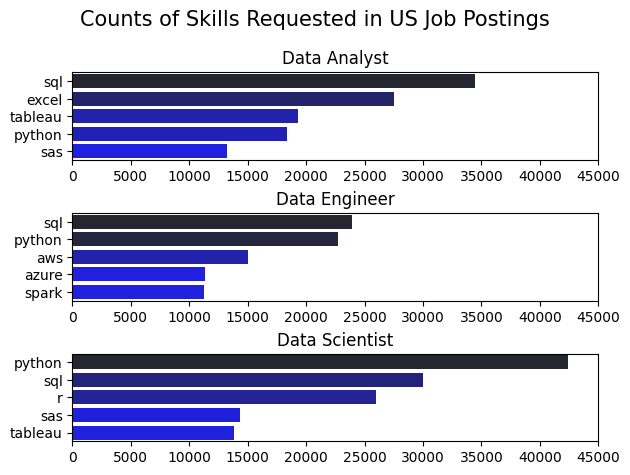

In [28]:
fig, ax = plt.subplots(len(top_3_job_title),1)

for i, job_title in enumerate(top_3_job_title):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

### To get in skill count in percent

In [22]:
# Use original df to get the count of job titles
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [23]:
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [24]:
df_skills_perc = pd.merge(df_skill_count,df_job_title_count,on='job_title_short',how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


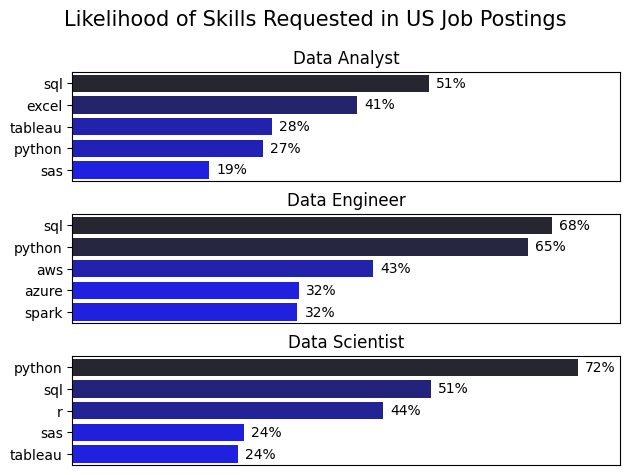

In [25]:
fig, ax = plt.subplots(len(top_3_job_title), 1)


for i, job_title in enumerate(top_3_job_title):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()